In [1]:
import pandas as pd 
import os

In [ ]:
pd.read_csv("../csv/2017/201701_expense_list.csv")

In [ ]:
# 지정된 경로의 있는 파일 목록 
files = os.listdir("../csv/2017")
files

1. 파일 목록 출력
2. 파일 목록을 불러와서 concat() 하나의 데이터프레임으로 결합

In [5]:
df_2017 = pd.DataFrame()

path = "../csv/2017/"

for file in files:
    df = pd.read_csv(path+file)
    df_2017 = pd.concat([df_2017, df], axis=0, ignore_index=True)



1. csv/2018에 있는 파일들도 df_2018로 데이터프레임으로 변환
2. total_df을 만들어서 2017데이터와 2018데이터를 결합

In [ ]:
files = os.listdir("../csv/2018")

df_2018 = pd.DataFrame()

path = "../csv/2018/"

for file in files:
    df = pd.read_csv(path+file)
    df_2018 = pd.concat([df_2018, df], axis=0, ignore_index=True)
df_2018

In [8]:
## total_df df_2017과 df_2018을 행 추가 단순 결합
total_df = pd.concat([df_2017, df_2018], axis=0, ignore_index=True)

In [ ]:
total_df.tail()

In [10]:
len(total_df)

142350

In [ ]:
## json 파일을 로드
pd.read_json("../csv/2019/201901_expense_list.json")
## xlsx 엑셀 파일 로드

In [12]:
pd.read_excel("../csv/2020/202001_expense_list.xlsx")

XLRDError: Excel xlsx file; not supported

In [17]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pd.read_excel("../csv/2020/202001_expense_list.xlsx", engine="openpyxl")

In [18]:
## dataframe 정보
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142350 entries, 0 to 142349
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   nid                142350 non-null  int64  
 1   title              142350 non-null  object 
 2   url                142350 non-null  object 
 3   dept_nm_lvl_1      142350 non-null  object 
 4   dept_nm_lvl_2      142156 non-null  object 
 5   dept_nm_lvl_3      124092 non-null  object 
 6   dept_nm_lvl_4      37693 non-null   object 
 7   dept_nm_lvl_5      6874 non-null    object 
 8   exec_yr            142350 non-null  int64  
 9   exec_month         142350 non-null  int64  
 10  expense_budget     6001 non-null    float64
 11  expense_execution  5015 non-null    float64
 12  category           2985 non-null    object 
 13  dept_nm_full       142271 non-null  object 
 14  exec_dt            142350 non-null  object 
 15  exec_loc           140883 non-null  object 
 16  ex

### total_df (2017, 2018 합친 데이터프레임)
1. 컬럼의 이름 변경 ['nid', '제목', 'url', '부서레벨1', '부서레벨2', '부서레벨3', '부서레벨4', '부서레벨5', '집행연도', '집행일', '예산', '집행', '구분', '부서명', '집행일시', '집행장소', '집행목적', '대상인원', '결제방법', '집행금액']
2. 컬럼 삭제 -> 부서레벨3, 부서레벨4, 부서레벨5, 예산, 집행, 구분
3. 연도별 집행금액의 합 -> 시각화 (바형 그래프)
4. 연도, 월 별 집행금액 합계를 시각화(바형 그래프)

In [20]:
## 컬럼의 이름을 변경
total_df.columns = ['nid', '제목', 'url', '부서레벨1', '부서레벨2', '부서레벨3', '부서레벨4', '부서레벨5', '집행연도', '집행일', '예산', '집행', '구분', '부서명', '집행일시', '집행장소', '집행목적', '대상인원', '결제방법', '집행금액']

In [21]:
total_df.drop(["부서레벨3", "부서레벨4", "부서레벨5", "예산", "집행", "구분"], axis=1, inplace=True)

In [22]:
total_df.head(1)

,nid,제목,url,부서레벨1,부서레벨2,집행연도,집행일,부서명,집행일시,집행장소,집행목적,대상인원,결제방법,집행금액
0,11430252,2017년 1월 장애인복지정책과 업무추진비 집행내역,http://opengov.seoul.go.kr/public/11430252,서울시본청,복지본부,2017,1,복지본부 장애인복지정책과,2017-01-26 13:10,동해일식 (중구 무교동),기본소득과 장애인복지 논의간담회,장애인복지정책팀장 외 2명,카드,76000


In [23]:
## 집행 연도를 기준으로 그룹화 집행금액의 합계를 출력
month_total = total_df.groupby("집행연도").sum()["집행금액"]
month_total

집행연도
2017    9076941387
2018    9937556542
Name: 집행금액, dtype: int64

In [24]:
import matplotlib.pyplot as plt
import matplotlib

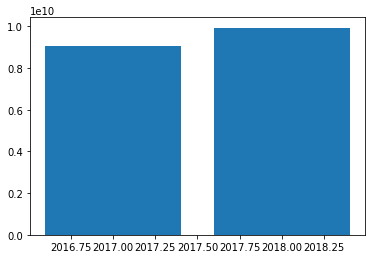

In [28]:
## 바형 그래프 
## x축 -> index
## y축 -> 집행금액의 합계
x = month_total.index
y = month_total

plt.bar(x, y)
plt.show()

In [ ]:
## pivot_table()의 형태로 변경 시각화
month_total = pd.pivot_table(total_df, index=["집행연도"], values=["집행금액"], aggfunc='sum')
month_total

<AxesSubplot:ylabel='집행연도'>

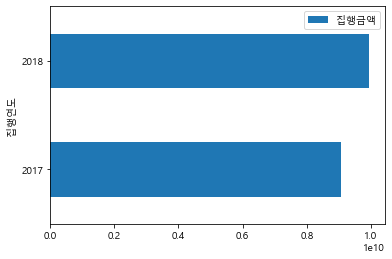

In [32]:
matplotlib.rcParams["font.family"] = "Malgun Gothic"
matplotlib.rcParams["axes.unicode_minus"] = False

(month_total).plot.barh()

In [ ]:
## 연도별 월별
month_total = total_df.groupby(["집행연도", "집행일"]).sum()["집행금액"]
month_total

In [ ]:
month_total.plot.bar()

In [ ]:
pivot_month = pd.pivot_table(total_df, index=["집행일"], columns=["집행연도"], 
values=["집행금액"], aggfunc='sum')
pivot_month

In [ ]:
pivot_month.plot.bar()

집행연도와 부서레벨1 별 집행 금액의 평균이 어떠한가 그래프로 표시

In [ ]:
dep_total = pd.pivot_table(total_df, index=["부서레벨1"], columns=["집행연도"], 
values=["집행금액"], aggfunc='mean')
dep_total

<AxesSubplot:ylabel='부서레벨1'>

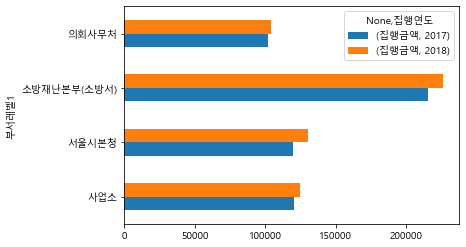

In [39]:
dep_total.plot.barh()

In [41]:
total_df.sort_values("집행일시")

,nid,제목,url,부서레벨1,부서레벨2,집행연도,집행일,부서명,집행일시,집행장소,집행목적,대상인원,결제방법,집행금액
27751,12250365,5월 업무추진비 사용내역,http://opengov.seoul.go.kr/public/12250365,서울시본청,도시재생본부,2017,5,도시재생본부 주거재생과,1970-01-01 09:00,왕왕생고기 (중구 을지로 1),창신숭인 도시재생사업 추진 관련 격려비용 지급,주거재생과장 외 4명,카드,47000
27750,12250365,5월 업무추진비 사용내역,http://opengov.seoul.go.kr/public/12250365,서울시본청,도시재생본부,2017,5,도시재생본부 주거재생과,1970-01-01 09:00,충무집 (중구 다동 140),주거환경개선과 현안업무처리 관련 격려비용 지급,주거사업기획관 외 5명,카드,65000
27754,12250365,5월 업무추진비 사용내역,http://opengov.seoul.go.kr/public/12250365,서울시본청,도시재생본부,2017,5,도시재생본부 주거재생과,1970-01-01 09:00,원주추어탕 (중구 무교로 17-27),도시재생사업 관련 격려비용 지급,주거재생과장 외 5명,카드,45000
611,11019667,2017년 1월 시의회사무처 도시안전건설전문위원실 업무추진비 집행내역,http://opengov.seoul.go.kr/public/11019667,의회사무처,도시안전건설전문위원실,2017,1,시의회사무처 도시안전건설전문위원실,1970-01-01 09:00,오후청(중구 남대문로1길 26-10),제272회 임시회 안건검토 관련 간담회비 지급,수석전문위원 외 14명,카드,177000
27752,12250365,5월 업무추진비 사용내역,http://opengov.seoul.go.kr/public/12250365,서울시본청,도시재생본부,2017,5,도시재생본부 주거재생과,1970-01-01 09:00,곰국시집 (중구 무교동 12-1),재생협력과 현안업무처리 관련 격려비용 지급,주거사업기획관 외 7명,카드,104000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136599,16919933,2018년 12월 사업소_상수도사업본부_북부수도사업소_급수운영과 업무추진비 내역,http://opengov.seoul.go.kr/public/16919933,사업소,상수도사업본부,2018,12,급수운영과,2019-12-24 13:37,엠엠피아이 (송파구 법원로),커피 등 구매,이문성 주무관 외 23명,카드,124330
138946,16950392,2018년 12월 사업소_상수도사업본부_중부수도사업소_행정지원과 업무추진비 내역,http://opengov.seoul.go.kr/public/16950392,사업소,상수도사업본부,2018,12,요금과,2019-12-24 15:13,㈜오피스메카(용산구 청파로),"민원응대 및 부서용 커피, 음료수구매",요금과 전직원 및 내방민원,카드,205500
138941,16950392,2018년 12월 사업소_상수도사업본부_중부수도사업소_행정지원과 업무추진비 내역,http://opengov.seoul.go.kr/public/16950392,사업소,상수도사업본부,2018,12,현장민원과,2019-12-26 10:40,엠엠피아이(주)(송파구법원로114),부서운영 커피 등 물품구입,1명(박미숙),카드,72350
136598,16919933,2018년 12월 사업소_상수도사업본부_북부수도사업소_급수운영과 업무추진비 내역,http://opengov.seoul.go.kr/public/16919933,사업소,상수도사업본부,2018,12,급수운영과,2019-12-26 12:57,신가네남원추어탕 (강북구 오현로),수계조절 및 누수탐지 관련 간담회,급수운영과장 외 8명,카드,112000
